In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [40]:
import platform

if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_excel('./파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [5]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND', 'TRANSACTION'], dtype=object)

In [6]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

In [7]:
df['pg'].unique()

array([nan, 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [8]:
df['pg'].value_counts()

INICIS    60087
KAKAO     17249
NAVER      8045
PAYCO      4642
CHAI        321
Name: pg, dtype: int64

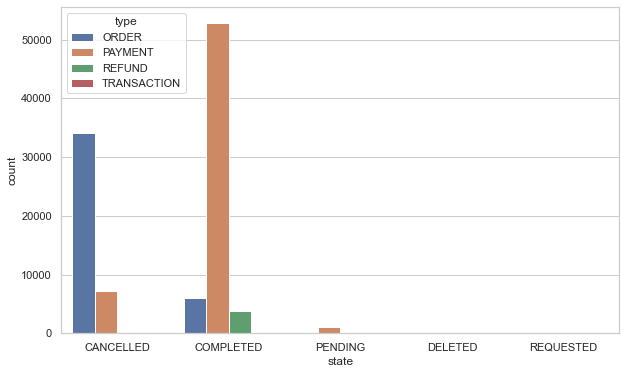

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='state', hue='type')
plt.show()

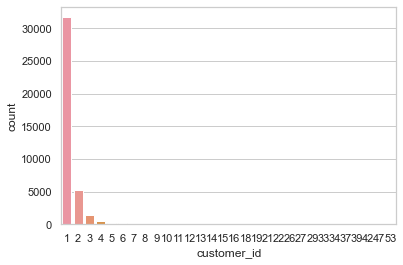

In [26]:
# 결제 완료 고객별 구매 횟수
plt.figure()
sns.countplot(data=df, x=df[(df['state']=='COMPLETED') & (df['type']=="PAYMENT")]['customer_id'].value_counts())
plt.show()

In [28]:
# 결제 완료 고객별 구매 횟수
df[(df['state']=='COMPLETED') & (df['type']=="PAYMENT")]['customer_id'].value_counts()

98685.0     53
427973.0    47
158374.0    42
50769.0     39
3189.0      39
            ..
110120.0     1
6453.0       1
135470.0     1
433637.0     1
610626.0     1
Name: customer_id, Length: 39519, dtype: int64

In [29]:
# 구매 한 고객들
order = df[(df['state']=='COMPLETED') & (df['type']=="PAYMENT")]

#1번 구매
order_idx = order.customer_id.value_counts().loc[order.customer_id.value_counts()==1].index
order_idx

Float64Index([611192.0,  50075.0, 612506.0, 584379.0, 580180.0, 506937.0,
              588017.0, 566308.0, 612527.0, 105296.0,
              ...
              447448.0, 544256.0, 544237.0, 538379.0, 544246.0, 110120.0,
                6453.0, 135470.0, 433637.0, 610626.0],
             dtype='float64', length=31692)

In [30]:
# 1번만 구매한 고객 df
df_1 = order.loc[order.customer_id.isin(order_idx)]
df_1.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
18,970682,478031.0,NaN,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT


In [31]:
# 2번 이상 구매
re_order_idx = order.customer_id.value_counts().loc[order.customer_id.value_counts()>1].index
re_order_idx

Float64Index([ 98685.0, 427973.0, 158374.0,  50769.0,   3189.0,   1189.0,
               40783.0, 276705.0, 106662.0,  65665.0,
              ...
              282099.0, 484241.0, 576297.0, 578010.0, 464318.0,  41824.0,
                 416.0, 483395.0, 656184.0, 659148.0],
             dtype='float64', length=7827)

In [32]:
# 2번 이상 구매한 고객 df
df_re = order.loc[order.customer_id.isin(re_order_idx)]
df_re.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
40,970730,445723.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
46,970740,474451.0,202883.0,PAYMENT,COMPLETED,올인원 패키지 : 디지털 마케팅 MAX 2020,마케팅,올인원,2021-03-28 16:28:42,114500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,134500.0,134500.0,NaN,CARD,디지털마케팅,NaT
47,970746,478085.0,203535.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,업무 생산성,올인원,2021-03-28 16:34:17,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,99000.0,NaN,CARD,PPT/보고서,2021-03-10
48,970750,478091.0,NaN,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 16:35:04,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT


In [33]:
df_1.coupon_title.notnull().sum()

13749

In [34]:
df_re.coupon_title.notnull().sum()

10012

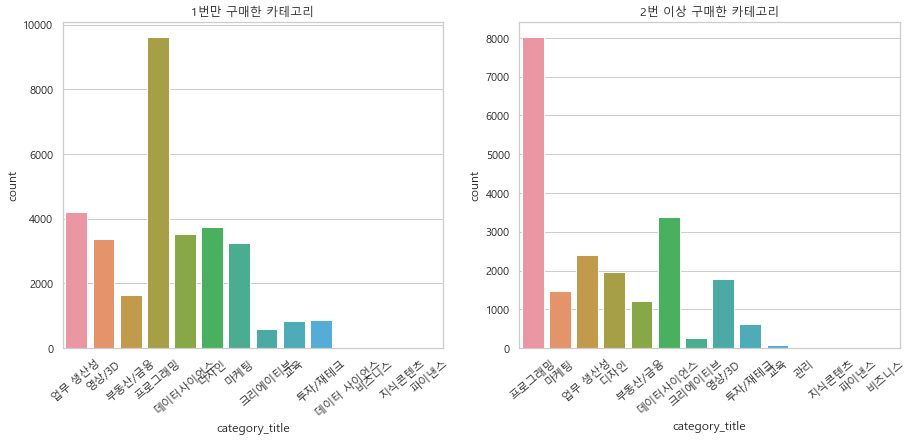

In [71]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xticks(rotation=40)
sns.countplot(data=df_1, x='category_title')
plt.title('1번만 구매한 카테고리')
plt.subplot(1,2,2)
plt.xticks(rotation=40)
sns.countplot(data=df_re, x='category_title')
plt.title('2번 이상 구매한 카테고리')
plt.show()

In [43]:
df_re['format'].value_counts()

올인원        18092
RED         1067
온라인 완주반      470
하루10분컷       431
스쿨           368
스쿨 온라인       313
B2B          155
B2G          144
B2B 온라인       92
이벤트           48
MBA           13
캠프             9
아카이브           7
관리             1
Name: format, dtype: int64

In [44]:
df_1['format'].value_counts()

올인원        25384
RED         2148
하루10분컷       908
온라인 완주반      893
B2B 온라인      885
스쿨           658
스쿨 온라인       289
B2B          241
B2G          205
이벤트           34
아카이브          24
캠프            12
MBA           10
Name: format, dtype: int64

In [45]:
# 2번만 구매한 df
df_2=df_re.loc[df_re.customer_id.isin(df_re.customer_id.value_counts().loc[df_re.customer_id.value_counts()==2].index)]
df_2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
40,970730,445723.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
47,970746,478085.0,203535.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,업무 생산성,올인원,2021-03-28 16:34:17,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,99000.0,NaN,CARD,PPT/보고서,2021-03-10
48,970750,478091.0,NaN,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 16:35:04,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
136,971051,477262.0,NaN,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 19:02:17,299000,NaN,NaN,299000.0,299000.0,NaN,TRANS,NaN,NaT
159,971145,468689.0,201547.0,PAYMENT,COMPLETED,올인원 패키지 : 구글 애널리틱스,마케팅,올인원,2021-03-28 19:52:38,88500,[럭키룰렛] 올인원패키지,20000.0,108500.0,108500.0,NaN,VBANK,데이터마케팅,NaT


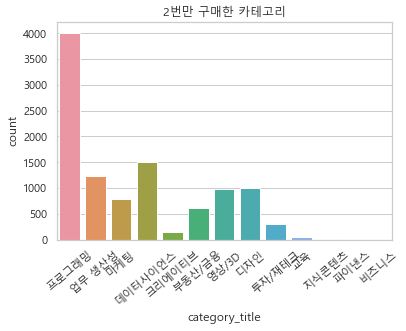

In [72]:
plt.figure()

plt.xticks(rotation=40)
sns.countplot(data=df_2, x='category_title')
plt.title('2번만 구매한 카테고리')

plt.show()

In [47]:
# 2번 구매 중 프로그래밍을 1번 구매한 고객
(df_2[df_2['category_title']=='프로그래밍']['customer_id'].value_counts()==1).sum()

920

In [48]:
# 2번 구매 중 프로그래밍을 2번 구매한 고객
(df_2[df_2['category_title']=='프로그래밍']['customer_id'].value_counts()==2).sum()

1545

In [49]:
# 2번 구매 중 데이터사이언스를 1번 구매한 고객
(df_2[df_2['category_title']=='데이터사이언스']['customer_id'].value_counts()==1).sum()

660

In [50]:
# 2번 구매 중 데이터사이언스를 2번 구매한 고객
(df_2[df_2['category_title']=='데이터사이언스']['customer_id'].value_counts()==2).sum()

426

In [51]:
# 2번 구매 중 디자인을 1번 구매한 고객
(df_2[df_2['category_title']=='디자인']['customer_id'].value_counts()==1).sum()

583

In [52]:
# 2번 구매 중 디자인을 2번 구매한 고객
(df_2[df_2['category_title']=='디자인']['customer_id'].value_counts()==2).sum()

208

In [53]:
df_2[df_2['category_title']=='프로그래밍']['course_title'].value_counts()

초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                           343
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                                300
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                                    187
네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트                                         162
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential    148
                                                                     ... 
스프링 아카데미아 강의 9 - 직접 적용해보는 TDD와 Spring Boot                              1
프로모션 : 비 전공자를 위한 프로그래밍 입문  iPad 패키지 (7월 현물 프리패스)                        1
프로모션 : 취업까지 순식간! 개발 취준생을 위한 합격 BEST PASS (7월 프리패스)                      1
프로모션 : 연봉 앞자리가 바뀌는 앱개발 BEST PASS (7월 프리패스)                              1
프로모션 : 개발자를 위한 코딩 만능 백과사전 PASS (6월 프리패스)                                1
Name: course_title, Length: 150, dtype: int64

In [54]:
# 2번 구매자 별 카테고리 df
df_2.set_index(['customer_id','category_title']).sort_index().head()

id  course_id     type      state  \
customer_id category_title                                           
47.0        데이터사이언스         1039780   203078.0  PAYMENT  COMPLETED   
            데이터사이언스         1206695   203533.0  PAYMENT  COMPLETED   
276.0       디자인             1029706   203523.0  PAYMENT  COMPLETED   
            부동산/금융           994937   202545.0  PAYMENT  COMPLETED   
362.0       마케팅             1249931   201892.0  PAYMENT  COMPLETED   

                                                      course_title format  \
customer_id category_title                                                  
47.0        데이터사이언스                    올인원 패키지 : 딥러닝을 활용한 추천시스템 구현    올인원   
            데이터사이언스         연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+    올인원   
276.0       디자인                        초격차 패키지 : 한번에 끝내는 UX/UI 디자인    올인원   
            부동산/금융                              올인원 패키지 : 부동산 디벨로퍼    올인원   
362.0       마케팅                             올인원 패키지 : 동영상 마케팅 2020    올인원   

                                  completed_at  transaction_amount  \
customer_id category_title                                           
47.0        데이터사이언스        2021-04-29 18:32:15              139500   
            데이터사이언스        2021-07-09 16:14:40              104000   
276.0       디자인            2021-04-26 10:49:58               30500   
            부동산/금융         2021-04-06 17:43:25              135500   
362.0       마케팅            2021-07-29 17:28:50              108500   

                                 coupon_title  coupon_discount_amount  \
customer_id category_title                                              
47.0        데이터사이언스                       NaN                     NaN   
            데이터사이언스                       NaN                     NaN   
276.0       디자인             4월 1+1 페이백 이벤트 쿠폰                135500.0   
            부동산/금융              [럭키룰렛] 올인원패키지                 10000.0   
362.0       마케팅                           NaN                     NaN   

                            sale_price  tax_free_amount      pg method  \
customer_id category_title                                               
47.0        데이터사이언스           139500.0         139500.0   KAKAO  POINT   
            데이터사이언스           104000.0         104000.0   KAKAO  POINT   
276.0       디자인               166000.0         166000.0  INICIS   CARD   
            부동산/금융            145500.0         145500.0     NaN   CARD   
362.0       마케팅               108500.0         108500.0   NAVER   CARD   

                           subcategory_title marketing_start_at  
customer_id category_title                                       
47.0        데이터사이언스                 딥러닝/인공지능         2020-10-13  
            데이터사이언스                     머신러닝         2021-01-05  
276.0       디자인                        UX/UI         2020-12-18  
            부동산/금융                    부동산 개발         2020-03-31  
362.0       마케팅                       SNS마케팅         2019-12-16

In [55]:
# 2번이상 재구매자 별 카테고리 df
df_re.set_index(['customer_id','category_title']).sort_index().head()

id  course_id     type      state  \
customer_id category_title                                           
47.0        데이터사이언스         1039780   203078.0  PAYMENT  COMPLETED   
            데이터사이언스         1206695   203533.0  PAYMENT  COMPLETED   
153.0       데이터사이언스         1322793   206044.0  PAYMENT  COMPLETED   
            데이터사이언스         1344225   203076.0  PAYMENT  COMPLETED   
            데이터사이언스         1348577   203355.0  PAYMENT  COMPLETED   

                                                              course_title  \
customer_id category_title                                                   
47.0        데이터사이언스                            올인원 패키지 : 딥러닝을 활용한 추천시스템 구현   
            데이터사이언스                 연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+   
153.0       데이터사이언스         올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드   
            데이터사이언스                         올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석   
            데이터사이언스                            올인원 패키지 : 처음부터 시작하는 딥러닝 유치원   

                           format        completed_at  transaction_amount  \
customer_id category_title                                                  
47.0        데이터사이언스           올인원 2021-04-29 18:32:15              139500   
            데이터사이언스           올인원 2021-07-09 16:14:40              104000   
153.0       데이터사이언스           올인원 2021-08-31 23:57:29              219000   
            데이터사이언스           올인원 2021-09-13 11:16:52              139000   
            데이터사이언스           올인원 2021-09-15 22:07:47              159000   

                           coupon_title  coupon_discount_amount  sale_price  \
customer_id category_title                                                    
47.0        데이터사이언스                 NaN                     NaN    139500.0   
            데이터사이언스                 NaN                     NaN    104000.0   
153.0       데이터사이언스                 NaN                     NaN    219000.0   
            데이터사이언스                 NaN                     NaN    139000.0   
            데이터사이언스                 NaN                     NaN    159000.0   

                            tax_free_amount      pg method subcategory_title  \
customer_id category_title                                                     
47.0        데이터사이언스                139500.0   KAKAO  POINT          딥러닝/인공지능   
            데이터사이언스                104000.0   KAKAO  POINT              머신러닝   
153.0       데이터사이언스                219000.0  INICIS   CARD              머신러닝   
            데이터사이언스                139000.0  INICIS   CARD             데이터분석   
            데이터사이언스                159000.0  INICIS   CARD          딥러닝/인공지능   

                           marketing_start_at  
customer_id category_title                     
47.0        데이터사이언스                2020-10-13  
            데이터사이언스                2021-01-05  
153.0       데이터사이언스                2021-07-26  
            데이터사이언스                2020-09-11  
            데이터사이언스                2021-01-14

In [56]:
df_re.set_index(['customer_id','category_title']).sort_index().value_counts('customer_id')

customer_id
98685.0     53
427973.0    47
158374.0    42
50769.0     39
3189.0      39
            ..
434275.0     2
434241.0     2
434191.0     2
433603.0     2
670686.0     2
Length: 7827, dtype: int64

In [57]:
# 고객별 카테고리별 구매 현황

df_re.pivot_table(
        values='course_title',
        index=(['customer_id','category_title']),
        columns=None,
        aggfunc='count',)

course_title
customer_id category_title              
47.0        데이터사이언스                    2
153.0       데이터사이언스                    3
172.0       업무 생산성                     1
            프로그래밍                      3
276.0       디자인                        1
...                                  ...
670167.0    디자인                        2
670338.0    프로그래밍                      2
670488.0    디자인                        2
670621.0    프로그래밍                      2
670686.0    프로그래밍                      2

[12706 rows x 1 columns]

In [58]:
# 같은 카테고리를 10번 이상 구매 한 고객
df_re.pivot_table(
        values='course_title',
        index=(['customer_id','category_title']),
        columns=None,
        aggfunc='count',).loc[
                                df_re.pivot_table(
                                values='course_title',
                                index=(['customer_id','category_title']),
                                columns=None,
                                aggfunc='count',)['course_title']>10
                            ]

,,course_title
customer_id,category_title,
3189.0,프로그래밍,18
19907.0,프로그래밍,14
50769.0,프로그래밍,14
83918.0,프로그래밍,11
98685.0,프로그래밍,16
158374.0,프로그래밍,18
192232.0,프로그래밍,11
276705.0,프로그래밍,11
417924.0,프로그래밍,15


In [59]:
# 가장많이 구매(53회) 고객
df_re[df_re['customer_id']==98685]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
5119,984635,98685.0,201998.0,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-01 10:19:28,24800,수강생 50만명 돌파 기념 감사제 쿠폰,87200.0,112000.0,112000.0,NaN,CARD,모바일앱,2020-01-14 00:00:00
6337,988664,98685.0,204342.0,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-04-03 00:08:50,55300,GA4 30% 할인쿠폰,23700.0,79000.0,79000.0,NaN,CARD,데이터마케팅,2021-04-02 00:00:00
6936,990338,98685.0,201798.0,PAYMENT,COMPLETED,올인원 패키지 : 브랜딩 2020,마케팅,올인원,2021-04-04 10:08:51,162100,NaN,NaN,162100.0,162100.0,NaN,CARD,SNS마케팅,2019-11-11 00:00:00
22011,1037244,98685.0,200399.0,PAYMENT,COMPLETED,올인원 패키지 : 리더를 위한 HR/인재경영,업무 생산성,올인원,2021-04-28 21:10:57,0,4월 1+1 페이백 이벤트 쿠폰,162100.0,111000.0,111000.0,NaN,PROMOTION,리더십,2019-03-22 00:00:00
22012,1037248,98685.0,201849.0,PAYMENT,COMPLETED,올인원 패키지 : 그로스 마케팅,마케팅,올인원,2021-04-28 21:11:43,0,4월 1+1 페이백 이벤트 쿠폰,178000.0,123000.0,123000.0,NaN,PROMOTION,데이터마케팅,2019-11-25 00:00:00
22014,1037252,98685.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-04-28 21:12:57,153300,초격차 패키지 : 한번에 끝내는 3D 디자인툴 30% 할인 쿠폰,65700.0,219000.0,219000.0,INICIS,CARD,디자인툴,2021-04-23 00:00:00
23448,1041392,98685.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-04-30 09:21:48,19500,NaN,NaN,19500.0,19500.0,INICIS,CARD,NaN,2021-04-28 00:00:00
28280,1054819,98685.0,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-05-06 09:33:53,19900,NaN,NaN,19900.0,19900.0,INICIS,CARD,NaN,2021-04-28 00:00:00
33455,1069671,98685.0,204631.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,프로그래밍,올인원,2021-05-13 23:03:57,69000,[럭키룰렛] 올인원패키지,10000.0,79000.0,79000.0,INICIS,CARD,백엔드 개발,NaT
50612,1127326,98685.0,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-06-08 11:12:38,32500,5월 페이백 프로모션 쿠폰,80000.0,112500.0,112500.0,INICIS,CARD,DevOps,NaT


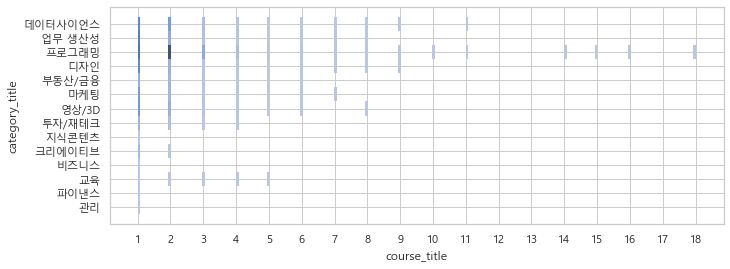

In [60]:
# 2번 이상 구매한 고객중 카테고리별로 한 고객이 구매한 횟수
plt.figure(figsize=(11,4))
plt.xticks(range(20))
sns.histplot(data = df_re.pivot_table(
                    values='course_title',
                    index=(['customer_id','category_title']),
                    columns=None,
                    aggfunc='count',),
            x = 'course_title', y='category_title')
plt.show()

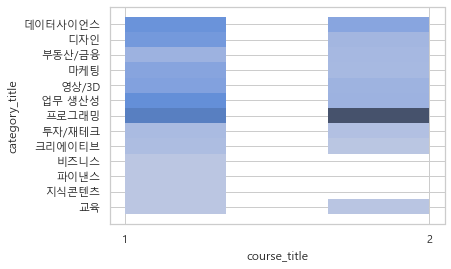

In [61]:
# 2번만 구매한 고객 중 카테고리별로 구매한 횟수
plt.figure()
plt.xticks(range(3))
sns.histplot(data = df_2.pivot_table(
                    values='course_title',
                    index=(['customer_id','category_title']),
                    columns=None,
                    aggfunc='count',),
            x = 'course_title', y='category_title', bins=3)
plt.show()

In [62]:
# 1명당 카테고리별 구매 횟수
df_re.pivot_table(
        values='course_title',
        index=(['customer_id','category_title']),
        columns=None,
        aggfunc='count',).loc[
                                (slice(None),'프로그래밍'),:
                            ]

,,course_title
customer_id,category_title,
172.0,프로그래밍,3
631.0,프로그래밍,6
634.0,프로그래밍,2
826.0,프로그래밍,1
897.0,프로그래밍,1
...,...,...
669234.0,프로그래밍,2
669970.0,프로그래밍,2
670338.0,프로그래밍,2


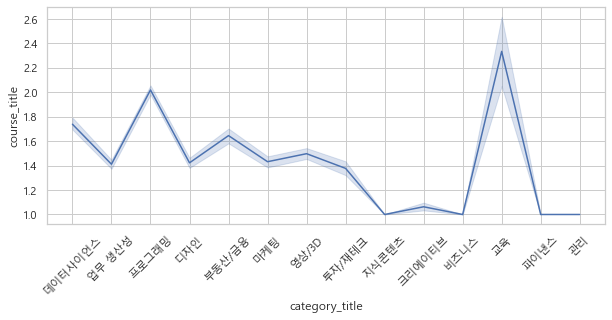

In [63]:
# 1명이 한 카테고리를 선택한 평균 횟수

plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
sns.lineplot(data=df_re.pivot_table(
                            values='course_title',
                            index=(['customer_id','category_title']),
                            columns=None,
                            aggfunc='count',),
            x='category_title', y='course_title')
plt.show()

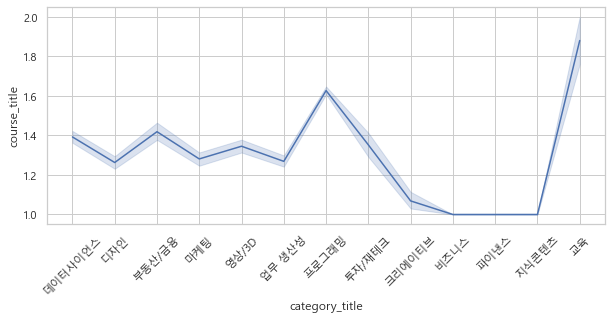

In [64]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
sns.lineplot(data=df_2.pivot_table(
                            values='course_title',
                            index=(['customer_id','category_title']),
                            columns=None,
                            aggfunc='count',),
            x='category_title', y='course_title')
plt.show()

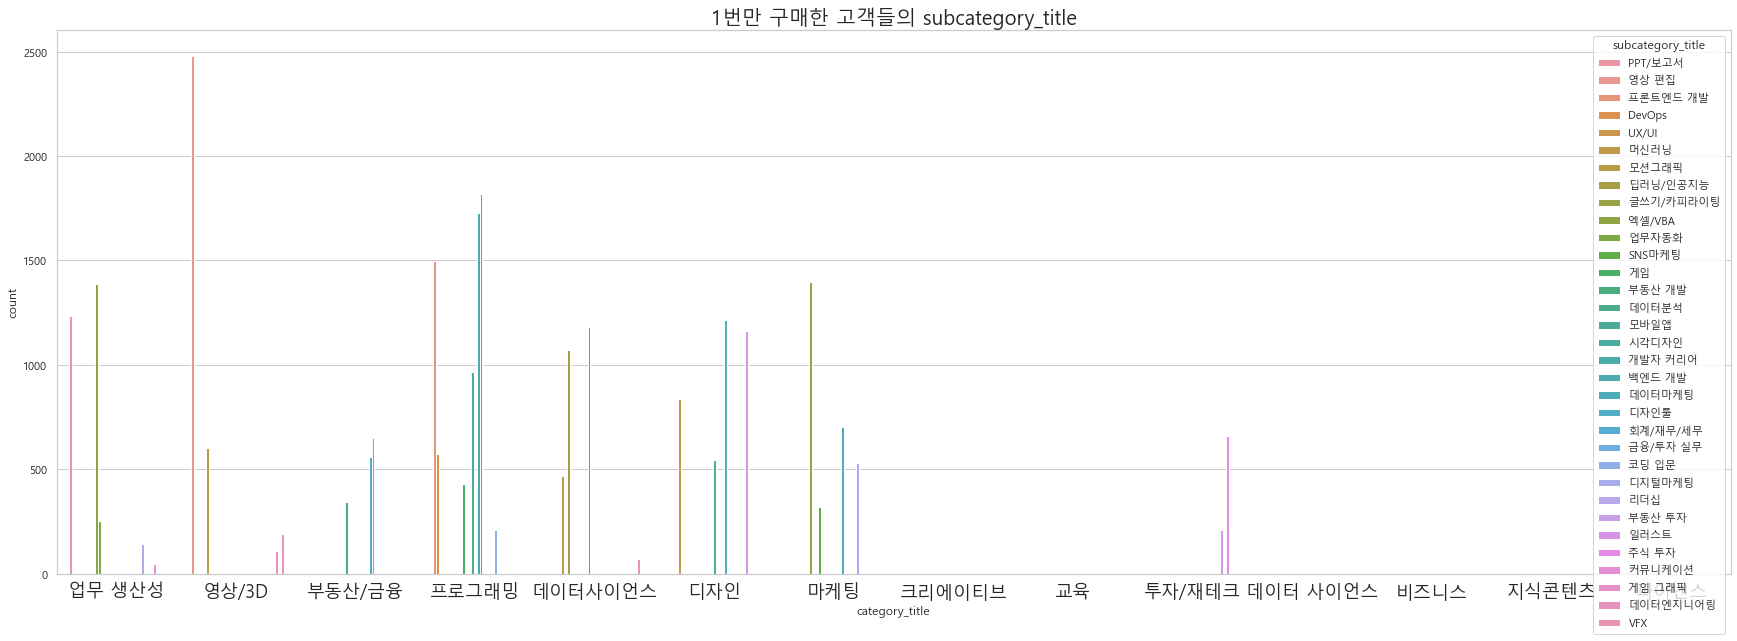

In [85]:
# 1번만 구매한 고객들의 subcategory_title
plt.figure(figsize=(30,10))
sns.countplot(data=df_1, x='category_title', hue='subcategory_title')
plt.title('1번만 구매한 고객들의 subcategory_title', fontsize=20)
plt.xticks(fontsize=18)
plt.show()

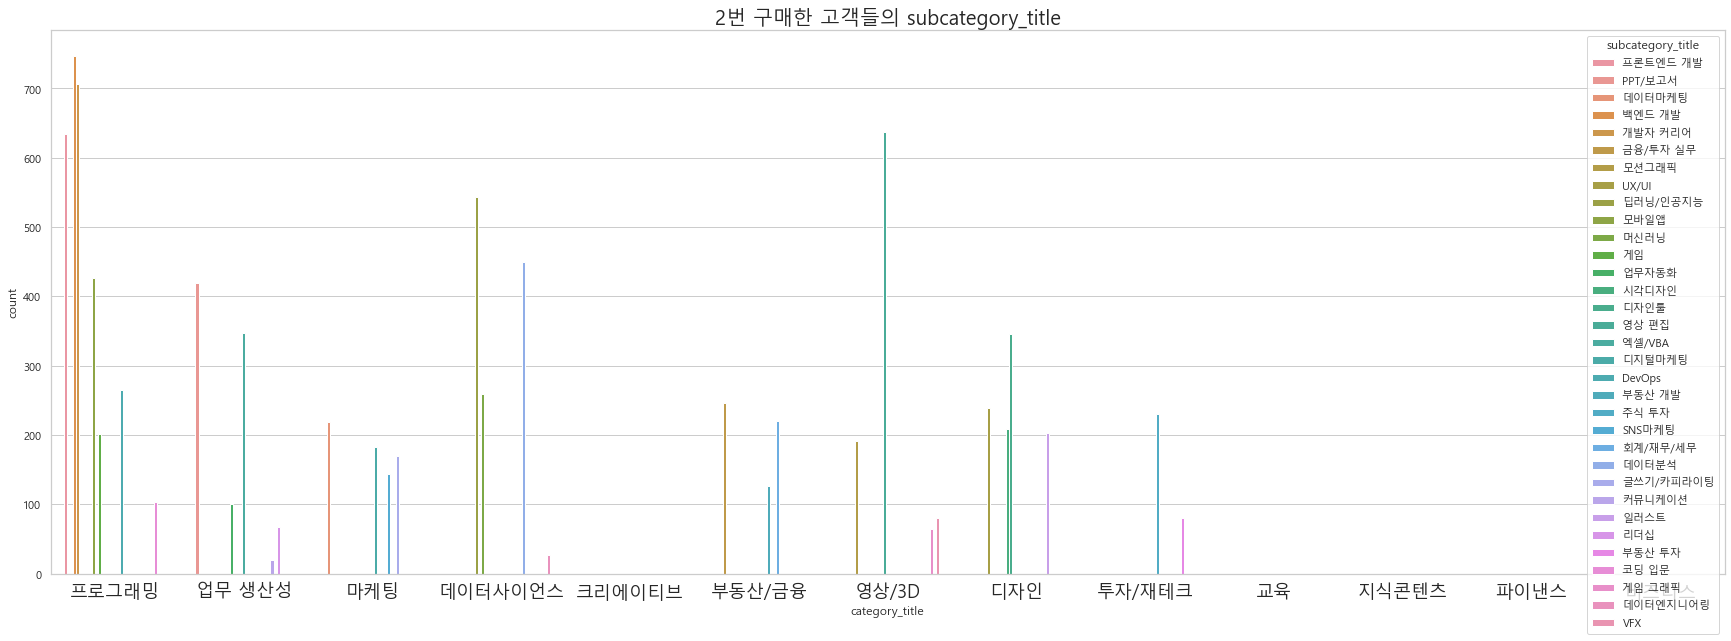

In [84]:
# 2번 구매한 고객들의 subcategory_title
plt.figure(figsize=(30,10))
sns.countplot(data=df_2, x='category_title', hue='subcategory_title')
plt.title('2번 구매한 고객들의 subcategory_title', fontsize=20)
plt.xticks(fontsize=18)
plt.show()

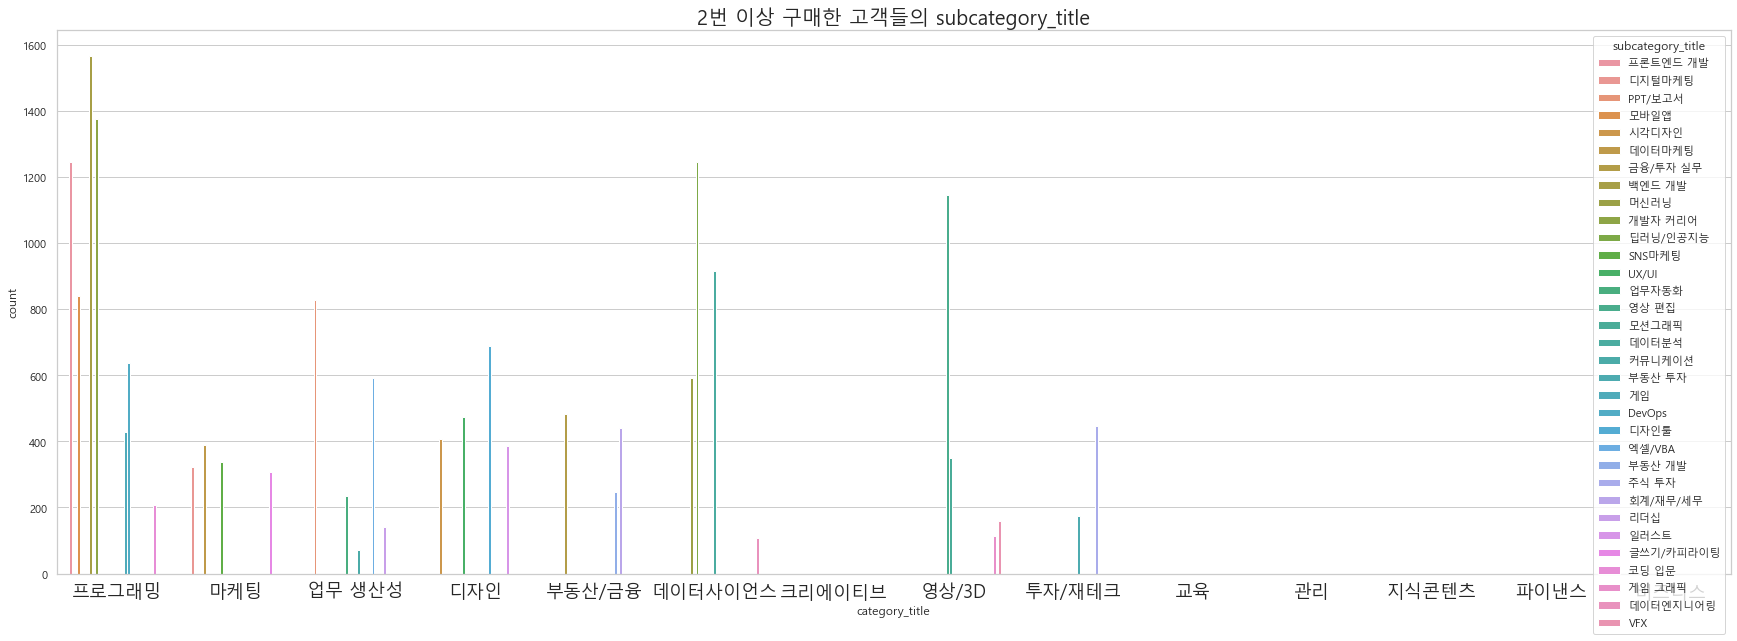

In [83]:
# 2번 이상 구매한 고객들의 subcategory_title
plt.figure(figsize=(30,10) )
sns.countplot(data=df_re, x='category_title', hue='subcategory_title')
plt.xticks(fontsize=18)
plt.title('2번 이상 구매한 고객들의 subcategory_title', fontsize=20)
plt.show()

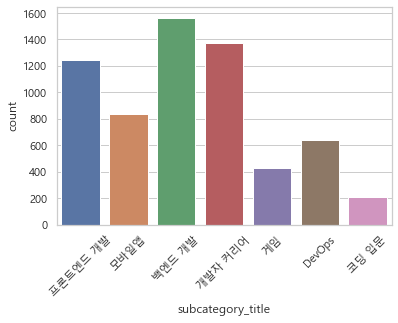

In [103]:
plt.figure()
sns.countplot(data=df_re[df_re['category_title']=='프로그래밍'], x='subcategory_title')
plt.xticks(rotation=45)
plt.show()